In [439]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

## Data cleaning 

In [440]:
df = pd.read_csv("marketing_campaign.csv", sep='\t')

In [441]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [442]:
values = ["Absurd", "YOLO"]

In [443]:
df = df[df.Marital_Status.isin(values) == False]

In [444]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [445]:
df.drop(df.iloc[:, 10:],inplace=True, axis=1)

C:\Users\shli_\AppData\Local\Temp\ipykernel_13200\1258331682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.iloc[:, 10:],inplace=True, axis=1)


In [446]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173
...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428


In [447]:
df.isna().sum().sum()

24

In [448]:
df = df.dropna()

In [449]:
df.isna().sum().sum()

0

In [450]:
df.reset_index(drop=True)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173
...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709
2208,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406
2209,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908
2210,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428


Standardize data

In [451]:
age = 2022 - df["Year_Birth"]

In [452]:
std_age = ((age - np.mean(age))/np.std(age))

In [453]:
std_income = ((df["Income"] - np.mean(df["Income"]))/np.std(df["Income"]))

In [454]:
std_kid = ((df["Kidhome"] - np.mean(df["Kidhome"]))/np.std(df["Kidhome"]))

In [455]:
std_teen = ((df["Teenhome"] - np.mean(df["Teenhome"]))/np.std(df["Teenhome"]))

In [456]:
df_customer = df["Dt_Customer"].apply(lambda x : pd.to_datetime(x))

C:\Users\shli_\AppData\Local\Temp\ipykernel_13200\3934350881.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_customer = df["Dt_Customer"].apply(lambda x : pd.to_datetime(x))


In [457]:
min_date = min(df_customer)

In [458]:
date_diff = (df_customer - min_date).astype(str).apply(lambda x : x.split()[0]).astype(int)

In [459]:
std_date_diff = ((date_diff - np.mean(date_diff))/np.std(date_diff))

In [460]:
std_recency = ((df["Recency"] - np.mean(df["Recency"]))/np.std(df["Recency"]))

In [461]:
std_MntWines = ((df["MntWines"] - np.mean(df["MntWines"]))/np.std(df["MntWines"]))

One hot encode all the categorical data

In [462]:
df["Education"].value_counts()

Graduation    1115
PhD            479
Master         364
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [463]:
df["Education"].value_counts()

Graduation    1115
PhD            479
Master         364
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [464]:
Graduation = (df["Education"] == "Graduation").astype(int)
Graduation.rename("Graduation", inplace=True)

0       1
1       1
2       1
3       1
4       0
       ..
2235    1
2236    0
2237    1
2238    0
2239    0
Name: Graduation, Length: 2212, dtype: int32

In [465]:
PhD = (df["Education"] == "PhD").astype(int)
PhD.rename("PhD", inplace=True)

0       0
1       0
2       0
3       0
4       1
       ..
2235    0
2236    1
2237    0
2238    0
2239    1
Name: PhD, Length: 2212, dtype: int32

In [466]:
Master = (df["Education"] == "Master").astype(int)
Master.rename("Master", inplace=True)

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    1
2239    0
Name: Master, Length: 2212, dtype: int32

In [467]:
Cycle = (df["Education"] == "2n Cycle").astype(int)
Cycle.rename("Cycle", inplace=True)

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: Cycle, Length: 2212, dtype: int32

In [468]:
Basic = (df["Education"] == "Basic").astype(int)
Basic.rename("Basic", inplace=True)

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: Basic, Length: 2212, dtype: int32

In [469]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Name: Marital_Status, dtype: int64

In [470]:
df["Marital_Status"] = df["Marital_Status"].replace(['Alone'],'Single')

C:\Users\shli_\AppData\Local\Temp\ipykernel_13200\2823060386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Marital_Status"] = df["Marital_Status"].replace(['Alone'],'Single')


In [471]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      474
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64

In [472]:
Married = (df["Marital_Status"] == "Married").astype(int)
Married.rename("Married", inplace=True)

0       0
1       0
2       0
3       0
4       1
       ..
2235    1
2236    0
2237    0
2238    0
2239    1
Name: Married, Length: 2212, dtype: int32

In [473]:
Together = (df["Marital_Status"] == "Together").astype(int)
Together.rename("Together", inplace=True)

0       0
1       0
2       1
3       1
4       0
       ..
2235    0
2236    1
2237    0
2238    1
2239    0
Name: Together, Length: 2212, dtype: int32

In [474]:
Single = (df["Marital_Status"] == "Single").astype(int)
Single.rename("Single", inplace=True)

0       1
1       1
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: Single, Length: 2212, dtype: int32

In [475]:
Divorced = (df["Marital_Status"] == "Divorced").astype(int)
Divorced.rename("Divorced", inplace=True)

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Name: Divorced, Length: 2212, dtype: int32

In [476]:
Widow = (df["Marital_Status"] == "Widow").astype(int)
Widow.rename("Widow", inplace=True)

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: Widow, Length: 2212, dtype: int32

In [477]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173
...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428


In [478]:
dataset = pd.concat([std_age, std_income, std_kid, std_teen, std_date_diff, std_recency, std_MntWines, Graduation,
               PhD, Master, Cycle, Basic, Married, Together, Single, Divorced, Widow], axis=1, join="inner")

In [479]:
dataset

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,Graduation,PhD,Master,Cycle,Basic,Married,Together,Single,Divorced,Widow
0,0.985949,0.234515,-0.824288,-0.92886,-1.976831,0.309300,0.977586,1,0,0,0,0,0,0,1,0,0
1,1.236380,-0.233840,1.038148,0.90892,1.665739,-0.381922,-0.871112,1,0,0,0,0,0,0,1,0,0
2,0.318133,0.769624,-0.824288,-0.92886,0.171682,-0.796656,0.358390,1,0,0,0,0,0,1,0,0,0
3,-1.267929,-1.016073,1.038148,-0.92886,1.924077,-0.796656,-0.871112,1,0,0,0,0,0,1,0,0,0
4,-1.017498,0.240670,1.038148,-0.92886,0.821834,1.553500,-0.391162,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.151179,0.357024,-0.824288,0.90892,-0.125407,-0.105433,1.196822,1,0,0,0,0,1,0,0,0,0
2236,1.904195,0.467858,2.900585,0.90892,1.941300,0.240178,0.299137,0,1,0,0,0,0,1,0,0,0
2237,-1.017498,0.188569,-0.824288,-0.92886,0.847668,1.449817,1.786391,1,0,0,0,0,0,0,0,1,0
2238,1.069426,0.675588,-0.824288,0.90892,0.843362,-1.418756,0.364316,0,0,1,0,0,0,1,0,0,0


# Run K-means without PCA

#### Try Elbow to find the optimal K

In [480]:
Kmeans_df = pd.concat([std_age, std_income, std_kid, std_teen, std_date_diff], axis=1, join="inner")

In [481]:
Kmeans_df

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer
0,0.985949,0.234515,-0.824288,-0.92886,-1.976831
1,1.236380,-0.233840,1.038148,0.90892,1.665739
2,0.318133,0.769624,-0.824288,-0.92886,0.171682
3,-1.267929,-1.016073,1.038148,-0.92886,1.924077
4,-1.017498,0.240670,1.038148,-0.92886,0.821834
...,...,...,...,...,...
2235,0.151179,0.357024,-0.824288,0.90892,-0.125407
2236,1.904195,0.467858,2.900585,0.90892,1.941300
2237,-1.017498,0.188569,-0.824288,-0.92886,0.847668
2238,1.069426,0.675588,-0.824288,0.90892,0.843362


In [482]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X = Kmeans_df


for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [483]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.1209925885531913
2 : 1.7853492890565998
3 : 1.5826197950794993
4 : 1.4198853306617236
5 : 1.3304212253870653
6 : 1.2565475742923846
7 : 1.254181052275536
8 : 1.2058833483693912
9 : 1.1400756438245139


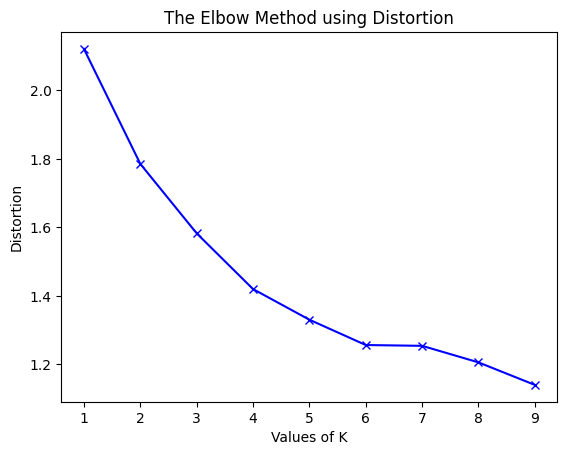

In [484]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [485]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 11060.000000000004
2 : 8314.093380856562
3 : 6858.883568728443
4 : 5792.761378284012
5 : 5159.33257747577
6 : 4726.137927007789
7 : 4200.988550120884
8 : 3899.628734293347
9 : 3529.2735228476377


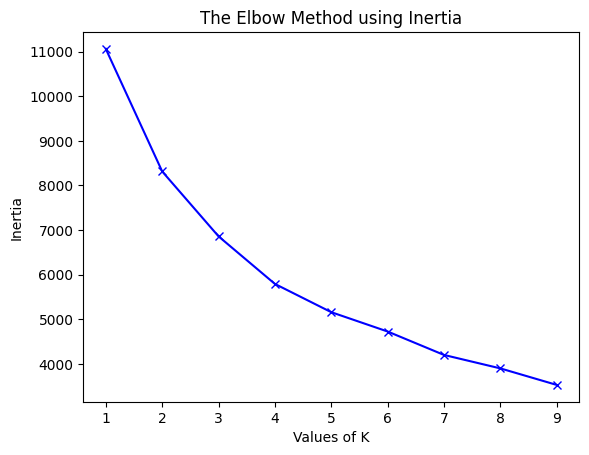

In [486]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

#### Try Silhouette to find the optimal K

In [487]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

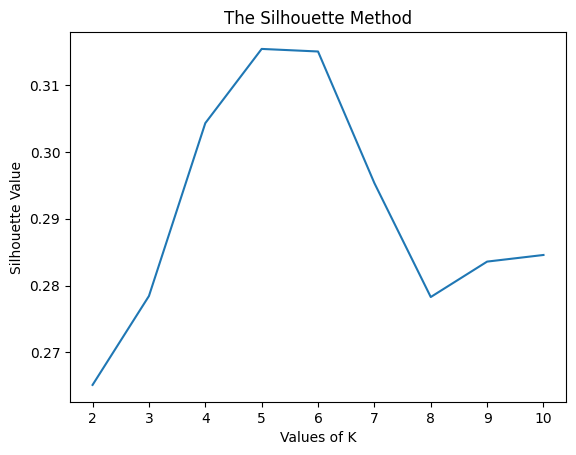

In [488]:
plt.plot(range(2,11), sil)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Value')
plt.title('The Silhouette Method')
plt.show()

#### Run K-means with k = 5

In [489]:
kmeans = KMeans(n_clusters=5).fit(Kmeans_df)
labels = kmeans.labels_

In [490]:
Kmeans_df

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer
0,0.985949,0.234515,-0.824288,-0.92886,-1.976831
1,1.236380,-0.233840,1.038148,0.90892,1.665739
2,0.318133,0.769624,-0.824288,-0.92886,0.171682
3,-1.267929,-1.016073,1.038148,-0.92886,1.924077
4,-1.017498,0.240670,1.038148,-0.92886,0.821834
...,...,...,...,...,...
2235,0.151179,0.357024,-0.824288,0.90892,-0.125407
2236,1.904195,0.467858,2.900585,0.90892,1.941300
2237,-1.017498,0.188569,-0.824288,-0.92886,0.847668
2238,1.069426,0.675588,-0.824288,0.90892,0.843362


In [491]:
Kmeans_df["cluster"] = labels.tolist()

In [492]:
Kmeans_df.groupby('cluster').mean()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer
cluster,,,,,
0,-0.958799,0.996069,-0.765059,-0.915872,-0.023958
1,-0.828891,-0.821947,0.914874,-0.928860,0.013398
2,0.408330,0.222251,-0.824288,0.994266,-0.070206
3,1.132443,0.552829,-0.818202,-0.922854,0.026360
4,0.297564,-0.323346,1.167361,1.001249,0.087506
